## Data Preparation

### Importing Libraries

In [ ]:
!pip install swifter

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
# Hiding all warnings
import warnings
warnings.filterwarnings('ignore')

# import numpy, pandas and other necessary libraries
import re
import numpy as np
import pandas as pd
import swifter
from wordcloud import STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [37]:
# Optimizing settings and configuraturation

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = 50

### Data Loading

In [38]:
# Reading the dataset

data = pd.read_csv('/content/drive/MyDrive/US_Accidents_June20.csv')

In [39]:
# Displaying initial data

data.head(5)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [40]:
# Understanding the dataset | Meta Data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

### Data Summarization

In [41]:
# Displaying the summary of the dataset

print('Rows     :',data.shape[0])
print('Columns  :',data.shape[1])

Rows     : 3513617
Columns  : 49


In [42]:
# Displaying the number of missing values per attribute

print('Percentage of Missing values:\n\n',(100*data.isnull().sum()/data.shape[0]).round(2))

Percentage of Missing values:

 ID                        0.00
Source                    0.00
TMC                      29.45
Severity                  0.00
Start_Time                0.00
End_Time                  0.00
Start_Lat                 0.00
Start_Lng                 0.00
End_Lat                  70.55
End_Lng                  70.55
Distance(mi)              0.00
Description               0.00
Number                   64.40
Street                    0.00
Side                      0.00
City                      0.00
County                    0.00
State                     0.00
Zipcode                   0.03
Country                   0.00
Timezone                  0.11
Airport_Code              0.19
Weather_Timestamp         1.23
Temperature(F)            1.87
Wind_Chill(F)            53.17
Humidity(%)               1.98
Pressure(in)              1.59
Visibility(mi)            2.16
Wind_Direction            1.68
Wind_Speed(mph)          12.94
Precipitation(in)        57.66
Weather

### Data Cleaning

#### Addressing Dataset Completeness

In [43]:
# Displaying the list of attributes with high amount of missing values (>20%)

print('Attributes with > 20% missing values: ', data.columns[(100*data.isnull().sum()/data.shape[0]).round(2)>20].tolist())

Attributes with > 20% missing values:  ['TMC', 'End_Lat', 'End_Lng', 'Number', 'Wind_Chill(F)', 'Precipitation(in)']


'TMC' is one of the important attribute which is communicated by the authorities, hence we would not delete it.

In [44]:
# Imputing the missing values in TMC to 201, since that means generic 'Accident' and we and not sure of further details.

data['TMC'].fillna(value=201, inplace=True)

In [45]:
# Removing the attributes from the dataset

data.drop(columns=['End_Lat', 'End_Lng', 'Number', 'Wind_Chill(F)', 'Precipitation(in)'], inplace=True)

In [46]:
# Checking if we still have missing values per attribute in our dataset
# Displaying the list of attributes with any amount of missing values (>0%)

print('Attributes with missing values: ', data.columns[(100*data.isnull().sum()/data.shape[0])>0].tolist())

Attributes with missing values:  ['Description', 'City', 'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


In [47]:
# Setting 'Wind_Speed(mph)' as 0 for rows where 'Wind_Direction' is 'Calm', meaning almost no wind.

data.loc[data['Wind_Direction'] == 'Calm', 'Wind_Speed(mph)'] = 0

In [48]:
# Dropping all rows with missing values since the less than 30% records gets deleted, and we have huge dataset

data.dropna(inplace=True)

In [49]:
# Checking if we still have missing values per attribute in our dataset
# Displaying the list of attributes with any amount of missing values (>0%)

print('Attributes with Missing values: ', data.columns[(100*data.isnull().sum()/data.shape[0])>0].tolist())

Attributes with Missing values:  []


In [50]:
# Converting datatype for attributes related to datetime.

data["Start_Time"]= pd.to_datetime(data["Start_Time"]) 
data["End_Time"]= pd.to_datetime(data["End_Time"])
data["Weather_Timestamp"]= pd.to_datetime(data["Weather_Timestamp"])

In [51]:
# Dropping the duplicate records, if any

data.drop_duplicates(inplace=True)

In [52]:
# Adding consistency to the various wind speed direction values

data['Wind_Direction'].replace({'North': 'N'}, inplace=True)
data['Wind_Direction'].replace({'East': 'E'}, inplace=True)
data['Wind_Direction'].replace({'West': 'W'}, inplace=True)
data['Wind_Direction'].replace({'South': 'S'}, inplace=True)
data['Wind_Direction'].replace({'VAR': 'Variable'}, inplace=True)
data['Wind_Direction'].replace({'CALM': 'Calm'}, inplace=True)

data['Wind_Direction'].unique()

array(['Calm', 'SW', 'SSW', 'WSW', 'WNW', 'NW', 'W', 'NNW', 'NNE', 'S',
       'Variable', 'N', 'SE', 'SSE', 'ESE', 'E', 'NE', 'ENE'],
      dtype=object)

In [53]:
# 'End_Time' should always be greater than 'Start_Time'

data.drop(data[data['End_Time']<data['Start_Time']].index, inplace=True)

#### Dropping unnecessary attributes

In [54]:
# Since the entire dataset is of one country, we can remove the attribute 'Country' as it contains only one value

data.drop(columns=['Country'], inplace=True)

In [55]:
# Since the entire dataset contains single value for 'Turning_Loop' we can remove the attribute 'Turning_Loop'

data.drop(columns=['Turning_Loop'], inplace=True)

In [56]:
# Since the ID column is an identifier, we can remove the attribute 'ID'

data.drop(columns=['ID'], inplace=True)

### Feature Engineering

#### Deriving the attribute 'Time_Duration(min)'

In [57]:
# Deriving the attribute 'Time_Duration(min)'

data.insert(4,'Time_Duration(min)',(data['End_Time']-data['Start_Time'])//np.timedelta64(1,'m'))

In [58]:
# Dropping the attribute 'End_Time' since it is redundant now

data.drop(columns=['End_Time'], inplace=True)

#### Splitting the 'Start_Time' timestamp to 'Year', 'Month', 'Day', 'Hour' and 'Weekend'

In [59]:
# Breaking 'Start_Time' into 'Year', 'Month', 'Day', 'Hour' and 'Weekend'

data['Year']=data['Start_Time'].dt.year
data['Month']=data['Start_Time'].dt.month
data['Day']=data['Start_Time'].dt.day
data['Hour']=data['Start_Time'].dt.hour
data['Minute']=data['Start_Time'].dt.minute
data['Weekday']=data['Start_Time'].dt.weekday

def weekday_text(w):
    d = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
    return d[w]
data['Weekday']=data['Weekday'].apply(lambda x:weekday_text(x))


In [60]:
# Dropping the attribute 'Start_Time' since it is redundant now

data.drop(columns=['Start_Time'], inplace=True)

#### Extracting 'Keyword' from 'Description' attribute

In [61]:

def clean(text):
    # lowercase
    text=text.lower()
    #remove tags
    text=re.sub("</?.*?>"," <> ",text)
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    return text

data['Description'] = data['Description'].swifter.apply(lambda x:clean(x))

# removing stopwords
data['Description'] = data['Description'].swifter.apply(lambda x: ' '.join([item for item in x.split(' ') if item not in STOPWORDS]))

#show the starting few 'Descriptions'
data['Description'][:10]

Pandas Apply:   0%|          | 0/3390171 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3390171 [00:00<?, ?it/s]

0    right lane blocked due accident eastbound exit...
1          accident brice rd tussing rd expect delays 
2    accident oh state route westbound dela palma r...
3        accident southbound exits b us expect delays 
4    accident mcewen rd oh miamisburg centerville r...
5    accident outerbelt northbound near exit oh sta...
6     accident oakridge dr woodward ave expect delays 
7    accident southbound exit b grand ave expect de...
8    accident notre dame ave warner ave expect delays 
9    right hand shoulder blocked due accident outer...
Name: Description, dtype: object

In [62]:
# Getting the Description (text) column 
docs=data['Description'].tolist()

# Creating a vocabulary of words, Ignoring words that appear in 85% of documents, Eliminating stop words
cv=CountVectorizer(max_df=0.85,stop_words=STOPWORDS)
word_count_vector=cv.fit_transform(docs)

# Displaying Shape
word_count_vector.shape

(3390171, 63600)

In [63]:
# Generating TFIDF Transformer

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)
tfidf_transformer.idf_

array([15.34324403, 15.34324403, 14.93777893, ..., 15.34324403,
       11.74593177, 14.93777893])

In [64]:
# Sorting the feature name based on score

def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)[:3]

# Extracting 
def extract_top5_from_vector(feature_names, sorted_items):
    keyword = []

    for idx, score in sorted_items:
        keyword.append(feature_names[idx])

    return ';'.join(keyword)

In [65]:
# Getting actual feature names

feature_names=cv.get_feature_names()

In [66]:
# Extracting the 'Keywords' from 'Description' attribute of dataset

def extract_description_keywords(doc):
    #generate tf-idf for the given document
    tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))
    #sort the tf-idf vectors by descending order of scores and get features
    sorted_items=sort_coo(tf_idf_vector.tocoo(copy=False))
    return extract_top5_from_vector(feature_names,sorted_items)

data['Keywords'] = data['Description'].swifter.apply(lambda x:extract_description_keywords(x))

Pandas Apply:   0%|          | 0/3390171 [00:00<?, ?it/s]

In [67]:
# Adding an attribute per keyword to be used for modelling

data['Keyword_1'] = data['Keywords'].swifter.apply(lambda x:str(x.split(';')[0]) if len(x.split(';'))>0 else None)
data['Keyword_2'] = data['Keywords'].swifter.apply(lambda x:str(x.split(';')[1]) if len(x.split(';'))>1 else None)
data['Keyword_3'] = data['Keywords'].swifter.apply(lambda x:str(x.split(';')[2]) if len(x.split(';'))>2 else None)

Pandas Apply:   0%|          | 0/3390171 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3390171 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3390171 [00:00<?, ?it/s]

In [68]:
# Displaying the number of missing values per attribute

print('Percentage of Missing values:\n\n',(100*data.isnull().sum()/data.shape[0]).round(2))

Percentage of Missing values:

 Source                    0.00
TMC                       0.00
Severity                  0.00
Time_Duration(min)        0.00
Start_Lat                 0.00
Start_Lng                 0.00
Distance(mi)              0.00
Description               0.00
Street                    0.00
Side                      0.00
City                      0.00
County                    0.00
State                     0.00
Zipcode                   0.00
Timezone                  0.00
Airport_Code              0.00
Weather_Timestamp         0.00
Temperature(F)            0.00
Humidity(%)               0.00
Pressure(in)              0.00
Visibility(mi)            0.00
Wind_Direction            0.00
Wind_Speed(mph)           0.00
Weather_Condition         0.00
Amenity                   0.00
Bump                      0.00
Crossing                  0.00
Give_Way                  0.00
Junction                  0.00
No_Exit                   0.00
Railway                   0.00
Roundab

In [69]:
# Removing records with missing values, i.e. missing 'Keywords' since they are only around 2.5%

data.dropna(inplace=True)

In [70]:
# Removing Redundant Column; 'Description' and 'Keywords'

data.drop(columns=['Description', 'Keywords'], inplace=True)

### Outlier Treatment

In [71]:
# Removing outliers | Time_Duration
# Removing records stating duration more than 12 days (since higher than 12 days is not recorded yet)

data.drop(data[data['Time_Duration(min)'] > (12*1440)].index, inplace=True)

In [72]:
# Removing outliers | Wind_Speed(mph)
# Removing records wind speed more than 260 mph (since higher than ~253mph is not recorded yet)

data.drop(data[data['Wind_Speed(mph)'] > 260].index, inplace=True)

In [73]:
# Removing outliers | Distance(mi)
# Removing records distance(mi) more than 109 miles (since higher than ~109 miles is not recorded yet)

data.drop(data[data['Distance(mi)'] > 109].index, inplace=True)

In [74]:
# Removing outliers | Temperature(F)
# Removing records temperature(f) more than 131.4 mph (since higher than ~134.1 F is not recorded yet)

data.drop(data[data['Temperature(F)'] > 134.1].index, inplace=True)

In [75]:
# Removing outliers | Pressure(in)
# Removing records pressure(in) less than 25.69 (since lesser than ~25.69 is not recorded yet)
# Removing records pressure(in) more than 32.03 (since higher than ~32.03 is not recorded yet)

data.drop(data[data['Pressure(in)'] < 25.69].index, inplace=True)
data.drop(data[data['Pressure(in)'] > 32.03].index, inplace=True)

In [76]:
# Removing outliers | Wind_Speed(mph)
# Removing records visibility(mi) more than 150 miles (since higher than ~150 miles is not recorded yet)

data.drop(data[data['Visibility(mi)'] > 150].index, inplace=True)

___

In [77]:
# Checking if none of the value is NaN and all of the values are finite and saving to file

if data.notnull().values.all() and not data.isnull().values.any():
    data.to_csv("data.csv", index=False)
    print('Data Saved')
else:
    print('Data Not Saved')

Data Saved


----

## Exploratory Data Analysis

In [78]:
%reset -f

# Hiding all warnings
import warnings
warnings.filterwarnings('ignore')

# import numpy and pandas
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# import for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# do an inline so that plt.show() is not required everytime
%matplotlib inline

In [79]:
# Reading the dataset

data = pd.read_csv('/content/data.csv').dropna()

In [80]:
# Analysing the 'Severity' attribute

#Textual Representation
print(data.groupby(by='Severity').size())

Severity
1      19599
2    1997503
3     879923
4     103372
dtype: int64


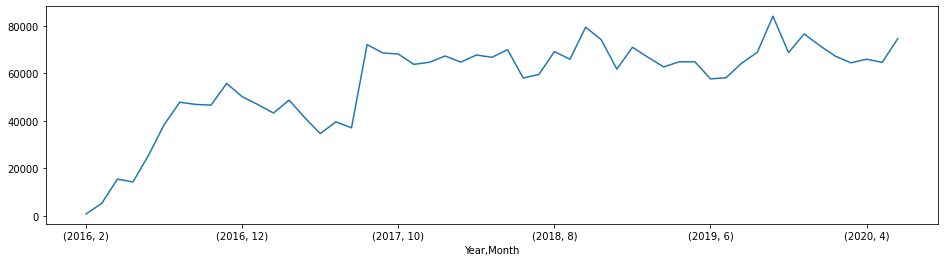

In [81]:
# Analysing the 'Timestamp' (Year, Month) attribute

fig = plt.figure(figsize = (16, 4))
data.groupby(by=['Year', 'Month']).size().plot()

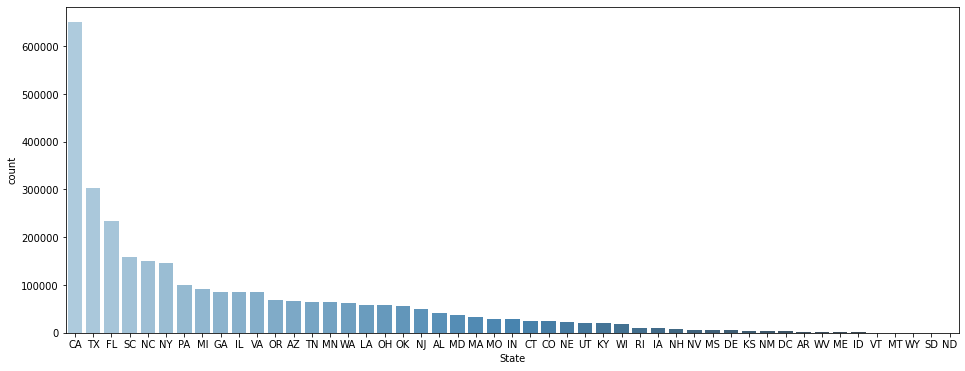

In [82]:
# Analysing the 'State' attribute

fig = plt.figure(figsize = (16, 6))
sns.countplot(x='State', data=data, order=data['State'].value_counts().index, palette='Blues_d')
plt.show()

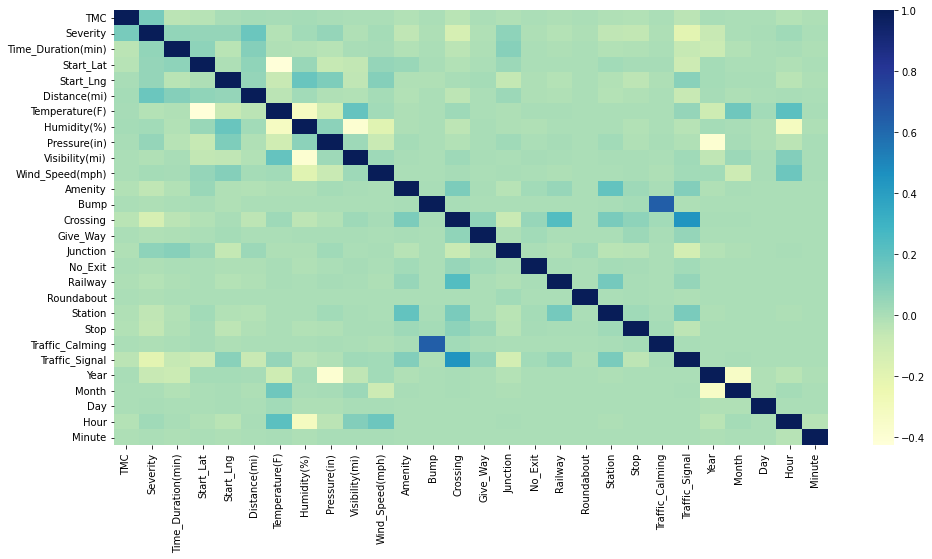

In [83]:
# plotting correlations on a heatmap

plt.figure(figsize=(16,8))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=False)
plt.show()

___

## Model Building and Evaluation

### Importing Libraries

In [153]:
# Deleting all data
#%reset -f

# Reloading necessary libraries
# import numpy and pandas
import pandas as pd
import numpy as np

# import for pre-processing
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

# import for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import for model building
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# import for Neural Network based model building
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [109]:
# Building model

result = {}
processed_data = pd.read_csv(f'/content/data.csv').dropna()
cols = processed_data.select_dtypes(include='object').columns

In [110]:
# Class Balancing | Using Up Sampling

# Separate majority and minority classes
df_s1 = processed_data[processed_data['Severity']==1]
df_s2 = processed_data[processed_data['Severity']==2]
df_s3 = processed_data[processed_data['Severity']==3]
df_s4 = processed_data[processed_data['Severity']==4]

count = max(df_s1.count()[0], df_s3.count()[0], df_s4.count()[0])

# Upsample minority class
df_s1 = resample(df_s1, replace=df_s1.count()[0]<count, n_samples=count, random_state=42)
df_s2 = resample(df_s2, replace=df_s2.count()[0]<count, n_samples=count, random_state=42)
df_s3 = resample(df_s3, replace=df_s3.count()[0]<count, n_samples=count, random_state=42)
df_s4 = resample(df_s4, replace=df_s4.count()[0]<count, n_samples=count, random_state=42)
 
# Combine majority class with upsampled minority class
processed_data = pd.concat([df_s1, df_s2, df_s3, df_s4])
 
# Display new class counts
processed_data.groupby(by='Severity')['Severity'].count()

Severity
1    879923
2    879923
3    879923
4    879923
Name: Severity, dtype: int64

In [111]:
# Set the target for the prediction
target='Severity' 

# set X and y
y = processed_data[target]
X = processed_data.drop(target, axis=1)

# Create the encoder.
encoder = OrdinalEncoder()
X[cols] = encoder.fit_transform(X[cols])

# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Split the data set into training and validation data sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, stratify=y_train, random_state=42)

# Scalling the features of Train Dataset, Validation Dataset and Test Dataset
scaler = StandardScaler()

# Scaling Train Dataset
scaler = scaler.fit(X_train)
X_train = scaler.transform(X_train)

# Scaling Validation Dataset
scaler = scaler.fit(X_val)
X_val = scaler.transform(X_val)

# Scaling Test Dataset
scaler = scaler.fit(X_test)
X_test = scaler.transform(X_test)

#### BUILDING MODEL USING SUPPORT VECTOR MACHINE

In [118]:
# Support Vector Machine | Final Evaluation

# Create a SVM Classifier
clf=SVC(gamma='auto', kernel='rbf', random_state=42)

# Train & Test
clf.fit(X_train[:20000], y_train[:20000])
y_train_pred= clf.predict(X_train[:20000])
y_test_pred= clf.predict(X_test[:20000])

# Detailed report of classification done by model
train_accuracy, test_accuracy = accuracy_score(y_train[:20000], y_train_pred), accuracy_score(y_test[:20000], y_test_pred)
print(classification_report(y_test[:20000], y_test_pred))
print(f'Accuracy for the train dataset {train_accuracy:.1%}')
print(f'Accuracy for the test dataset {test_accuracy:.1%}')

# storing the accuracy score
result['Support Vector Machine'] = {round(train_accuracy*100, 1), round(test_accuracy*100,1)}

              precision    recall  f1-score   support

           1       0.83      0.94      0.88      5045
           2       0.76      0.52      0.62      5021
           3       0.67      0.77      0.72      4951
           4       0.80      0.83      0.82      4983

    accuracy                           0.77     20000
   macro avg       0.77      0.77      0.76     20000
weighted avg       0.77      0.77      0.76     20000

Accuracy for the train dataset 78.7%
Accuracy for the test dataset 76.5%


**Summary**: We are getting decent accuracy with SVM, but, the computation time is very high, even with limited dataset.

#### BUILDING MODEL USING DECISION TREE

In [144]:
# Decision Tree Algorithm | Final Evaluation

# Instantiate a Decision Tree Classifier with Best Parameters
clf = DecisionTreeClassifier(random_state=42)

# Train & Test
clf.fit(X_train[:20000], y_train[:20000])
y_train_pred= clf.predict(X_train[:200000])
y_test_pred= clf.predict(X_test[:20000])

# Detailed report of classification done by model
train_accuracy, test_accuracy = accuracy_score(y_train[:200000], y_train_pred), accuracy_score(y_test[:20000], y_test_pred)
print(classification_report(y_test[:20000], y_test_pred))
print(f'Accuracy for the train dataset {train_accuracy:.1%}')
print(f'Accuracy for the test dataset {test_accuracy:.1%}')

# Highlighting the significance of each of the factors in the model
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
print("\nImportant features:\n", feature_imp.sort_values(ascending=False)[:10])

# storing the accuracy score
result['Decision Tree'] = {round(train_accuracy*100, 1), round(test_accuracy*100,1)}

              precision    recall  f1-score   support

           1       0.89      0.85      0.87      5045
           2       0.65      0.66      0.65      5021
           3       0.67      0.67      0.67      4951
           4       0.86      0.88      0.87      4983

    accuracy                           0.77     20000
   macro avg       0.77      0.77      0.77     20000
weighted avg       0.77      0.77      0.77     20000

Accuracy for the train dataset 80.2%
Accuracy for the test dataset 76.6%

Important features:
 Weather_Timestamp    0.241109
Source               0.189278
Street               0.057178
Distance(mi)         0.056246
Keyword_2            0.045446
Keyword_3            0.038465
Zipcode              0.037176
Side                 0.031444
Start_Lat            0.031439
Keyword_1            0.030468
dtype: float64


**Summary**: We are getting decent accuracy with Decision Tree algorithm and computation time is also comparatively less.

#### BUILDING MODEL USING RANDOM FOREST

In [123]:
# Random Forest Algorithm | Final Evaluation

# Create a Random Forest Classifier
clf=RandomForestClassifier(n_estimators = 200, bootstrap = False, max_depth = 16, min_samples_leaf = 50, min_samples_split = 200, n_jobs=-1, random_state=42)

# Train & Test
clf.fit(X_train[:20000], y_train[:20000])
y_train_pred= clf.predict(X_train[:20000])
y_test_pred= clf.predict(X_test[:20000])

# Detailed report of classification done by model
train_accuracy, test_accuracy = accuracy_score(y_train[:20000], y_train_pred), accuracy_score(y_test[:20000], y_test_pred)
print(classification_report(y_test[:20000], y_test_pred))
print(f'Accuracy for the train dataset {train_accuracy:.1%}')
print(f'Accuracy for the test dataset {test_accuracy:.1%}')

# Highlighting the significance of each of the factors in the model
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
print("\nImportant features:\n", feature_imp.sort_values(ascending=False)[:10])

# storing the accuracy score
result['Random Forest'] = {round(train_accuracy*100, 1), round(test_accuracy*100,1)}

              precision    recall  f1-score   support

           1       0.88      0.94      0.91      5045
           2       0.79      0.62      0.70      5021
           3       0.73      0.75      0.74      4951
           4       0.80      0.89      0.85      4983

    accuracy                           0.80     20000
   macro avg       0.80      0.80      0.80     20000
weighted avg       0.80      0.80      0.80     20000

Accuracy for the train dataset 81.2%
Accuracy for the test dataset 80.3%

Important features:
 Source                0.183118
Weather_Timestamp     0.163063
Distance(mi)          0.125110
Year                  0.109456
Time_Duration(min)    0.077454
Street                0.065321
Keyword_2             0.033694
Month                 0.028320
Side                  0.027799
Traffic_Signal        0.021212
dtype: float64


**Summary**: We are getting good accuracy with Random Forest algorithm and computation time is also comparatively less.

#### BUILDING MODEL USING K-NEAREST NEIGHBOR (KNN)

In [125]:
# K-Nearest Neighbor | First Iteration

# Create a k-NN classifier
clf = KNeighborsClassifier(n_jobs=-1)

# Train & Test
clf.fit(X_train[:20000], y_train[:20000])
y_train_pred= clf.predict(X_train[:20000])
y_test_pred= clf.predict(X_test[:20000])

# Detailed report of classification done by model

train_accuracy, test_accuracy = accuracy_score(y_train[:20000], y_train_pred), accuracy_score(y_test[:20000], y_test_pred)
print(classification_report(y_test[:20000], y_test_pred))
print(f'Accuracy for the train dataset {train_accuracy:.1%}')
print(f'Accuracy for the test dataset {test_accuracy:.1%}')

# storing the accuracy score
result['K-Nearest Neighbors'] = {round(train_accuracy*100, 1), round(test_accuracy*100,1)}

              precision    recall  f1-score   support

           1       0.68      0.92      0.78      5045
           2       0.60      0.50      0.54      5021
           3       0.62      0.63      0.63      4951
           4       0.79      0.62      0.70      4983

    accuracy                           0.67     20000
   macro avg       0.67      0.67      0.66     20000
weighted avg       0.67      0.67      0.66     20000

Accuracy for the train dataset 76.2%
Accuracy for the test dataset 66.9%


**Summary**: We are getting poor accuracy with K-Nearest Neighbor algorithm and the computation time is very high, even with limited dataset.

#### BUILDING MODEL USING NEURAL NETWORK

In [128]:
# Neural Network | First Iteration

model = Sequential()
model.add(Dense(128, input_dim=np.size(X_train,1), activation='relu'))
model.add(Dense(64, input_dim=np.size(X_train,1), activation='relu'))
model.add(Dense(5, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# build the model
history = model.fit(X_train[:20000], to_categorical(y_train[:20000].to_numpy()), 
                    epochs=50, validation_data=(X_val, to_categorical(y_val.to_numpy())), 
                    validation_steps=30, verbose=0)


loss, train_accuracy = model.evaluate(X_train[:20000], to_categorical(y_train[:20000].to_numpy()), verbose=0)
print(f"\nFor Training Dataset: Loss: {loss} and Accuracy: {train_accuracy}")

loss, test_accuracy = model.evaluate(X_test[:20000], to_categorical(y_test[:20000].to_numpy()), verbose=0)
print(f"\nFor Testing Dataset: Loss: {loss} and Accuracy: {test_accuracy}")

# storing the accuracy score
result['Neural Network'] = {round(train_accuracy*100, 1), round(test_accuracy*100,1)}


For Training Dataset: Loss: 0.18341359496116638 and Accuracy: 0.9307500123977661

For Testing Dataset: Loss: 1.0807437896728516 and Accuracy: 0.7434999942779541


**Summary**: We are getting decent accuracy with Neural Network and computation time is also comparatively less.

In [187]:
# Showing the results
res_df = pd.DataFrame.from_dict({i: result[i] for i in result.keys()},orient='index', columns = ["Test Accuracy", "Train Accuracy"])
res_df = res_df.reset_index(level=0)
res_df

,index,Test Accuracy,Train Accuracy
0,Support Vector Machine,76.5,78.7
1,Decision Tree,80.2,76.6
2,Random Forest,80.3,81.2
3,K-Nearest Neighbors,66.9,76.2
4,Neural Network,74.3,93.1


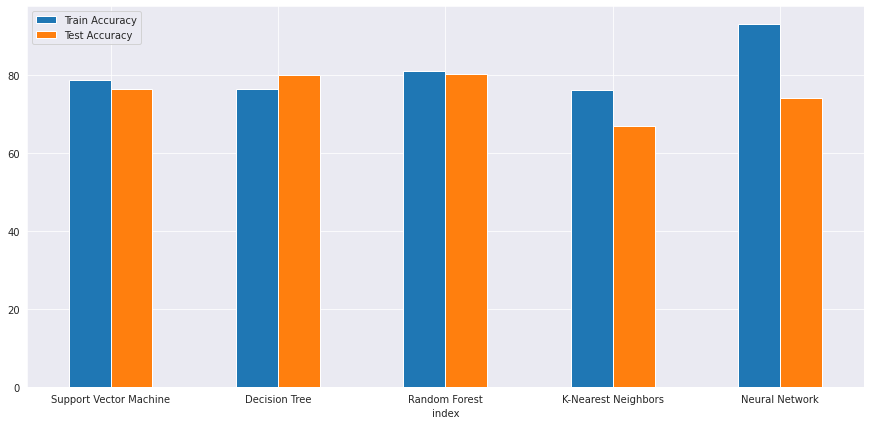

In [189]:
res_df.plot.bar(x='index', y=["Train Accuracy", "Test Accuracy"], rot=0, figsize = (15,7), grid=True)